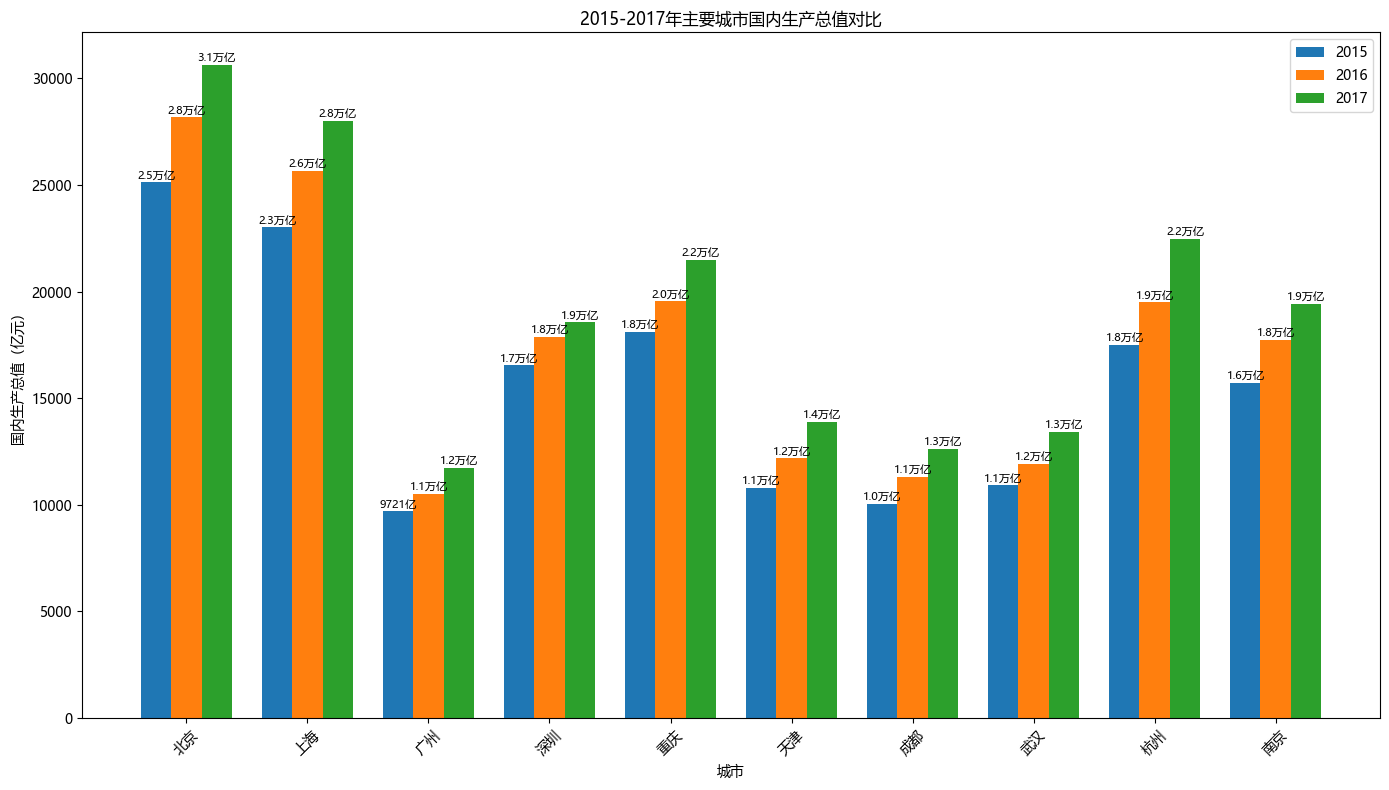

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df2015 = pd.read_csv('2015年国内主要城市年度数据.csv')
df2016 = pd.read_csv('2016年国内主要城市年度数据.csv')
df2017 = pd.read_csv('2017年国内主要城市年度数据.csv')

# 合并数据
df = pd.concat([df2015, df2016, df2017])
df = df.sort_values(by=['地区', '年份'])

# 筛选主要城市（避免图表过于拥挤）
major_cities = ['北京', '上海', '广州', '深圳', '重庆', '天津', '成都', '武汉', '杭州', '南京']
df = df[df['地区'].isin(major_cities)]

# 创建图表
plt.figure(figsize=(14, 8))

# 设置柱状图位置
x = np.arange(len(major_cities))
width = 0.25

# 绘制各年GDP柱状图
bars2015 = plt.bar(x - width, df[df['年份']==2015]['国内生产总值'], width, label='2015', color='#1f77b4')
bars2016 = plt.bar(x, df[df['年份']==2016]['国内生产总值'], width, label='2016', color='#ff7f0e')
bars2017 = plt.bar(x + width, df[df['年份']==2017]['国内生产总值'], width, label='2017', color='#2ca02c')

# 添加标签和标题
plt.xlabel('城市')
plt.ylabel('国内生产总值（亿元）')
plt.title('2015-2017年主要城市国内生产总值对比')
plt.xticks(x, major_cities, rotation=45)
plt.legend()

# 添加数据标签
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height/10000:.1f}万亿' if height > 10000 else f'{height:.0f}亿',
                ha='center', va='bottom', fontsize=8)

add_labels(bars2015)
add_labels(bars2016)
add_labels(bars2017)

plt.tight_layout()
plt.show()

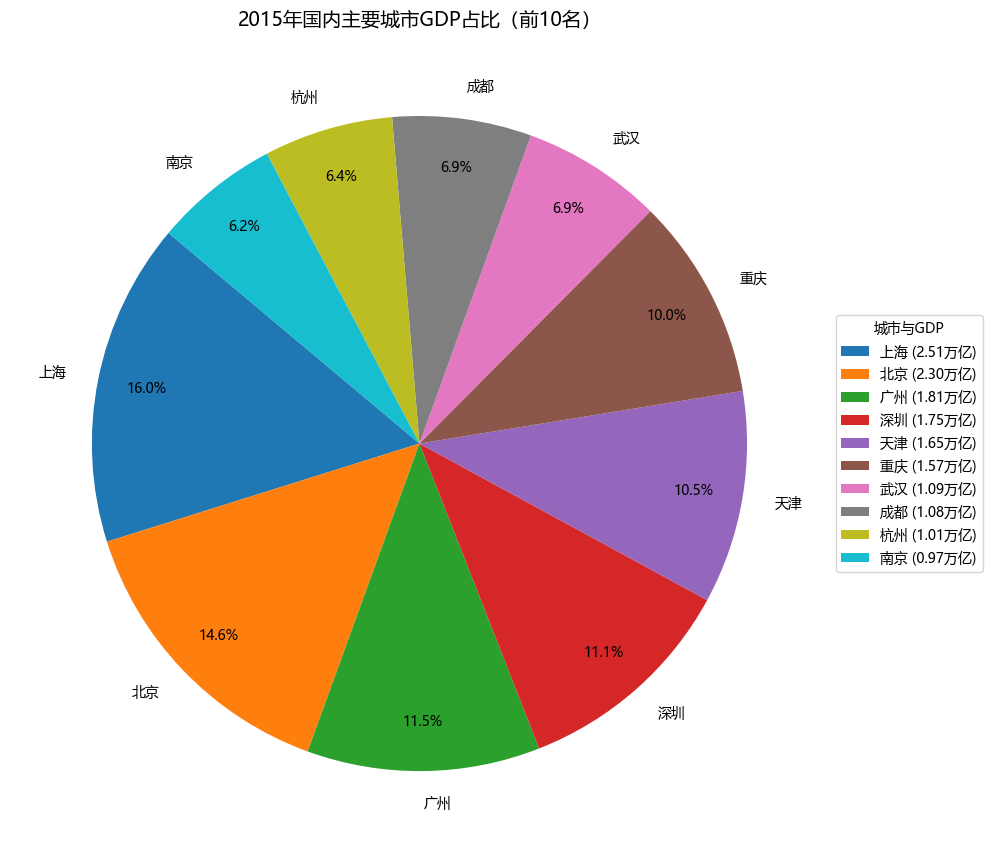

In [3]:
# 筛选2015年数据并按GDP排序
df2015_sorted = df2015.sort_values('国内生产总值', ascending=False)

# 取前10大城市（避免饼图过于拥挤）
top10 = df2015_sorted.head(10)

# 创建饼图
plt.figure(figsize=(10, 10))
plt.pie(top10['国内生产总值'],
        labels=top10['地区'],
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.85,
        textprops={'fontsize': 10})

# 添加标题
plt.title('2015年国内主要城市GDP占比（前10名）', fontsize=14)

# 添加图例（显示具体数值）
legend_labels = [f'{region} ({gdp/10000:.2f}万亿)' for region, gdp in zip(top10['地区'], top10['国内生产总值'])]
plt.legend(legend_labels, title='城市与GDP', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()